In [1]:
import numpy as np
import cupy as cp
import dxchange
import time
import matplotlib.pyplot as plt

from streamtomocupy import config
from streamtomocupy import streamrecon
%matplotlib inline

cp.cuda.set_pinned_memory_allocator(cp.cuda.PinnedMemoryPool().malloc)

astropy module not found
olefile module not found


In [2]:
def get_data_pars(args, proj, flat, dark):
    '''Get parameters of the data'''

    args.nproj = proj.shape[0]
    args.nz = proj.shape[1]
    args.n = proj.shape[2]
    args.nflat = flat.shape[0]
    args.ndark = dark.shape[0]
    args.in_dtype = proj.dtype    
    return args        

In [3]:
# init parameters with default values. can be done ones
config.write_args('test.conf')

# read parameters
args = config.read_args('test.conf')

proj, flat, dark, theta = dxchange.read_aps_32id('/home/beams/TOMO/conda/tomocupy/tests/data/test_data.h5')
proj=np.pad(proj,((0,0),(0,0),(256,256)),'edge')
flat=np.pad(flat,((0,0),(0,0),(256,256)),'edge')
dark=np.pad(dark,((0,0),(0,0),(256,256)),'edge')

# proj = 100*np.ones([2048,2048,2048],dtype='uint16')
# dark = np.zeros([20,2048,2048],dtype='uint16')
# flat = 200*np.ones([10,2048,2048],dtype='uint16')
# theta = np.linspace(0,np.pi,2048).astype('float32')

args = get_data_pars(args,proj, flat, dark)

# streaming reconstruction class
t = time.time()
cl_recstream = streamrecon.StreamRecon(args)
print(time.time()-t)

# processing and reconstruction
t = time.time()
cl_recstream.rec_steps(proj, dark, flat, theta)
print(time.time()-t)

5.591094493865967
0.42595767974853516


6.112148


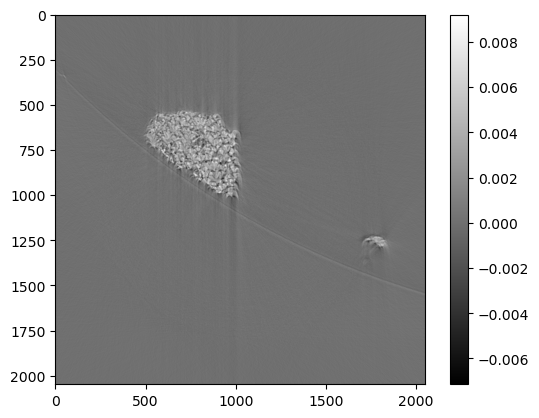

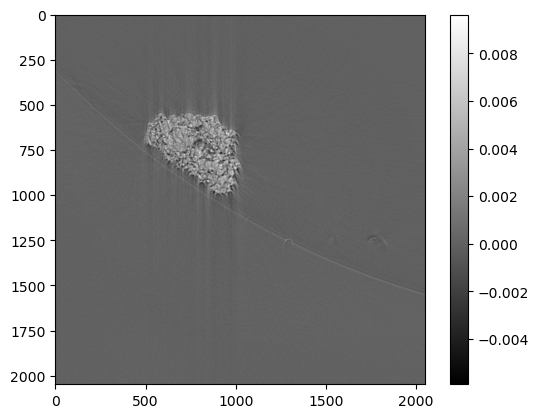

In [4]:
res = cl_recstream.get_res(2)
print(np.linalg.norm(res.astype('float32')))
plt.imshow(res[0],cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(res[-1],cmap='gray')
plt.colorbar()
plt.show()